
<h1> Laboratório 3 – Captura de Imagem e Vídeo </h1>
<h3> Data de realização de experimentos: 25/02/2026 </h3>
<h3> Data de realização de publicação do relatório: 27/02/2026 </h3> <br>


<p>Nome: Fabricio da costa Fernandes - RA:11202321635 </p>
<p>Nome: Felipe de Lima Major - RA:11202230321 </p>
<p>Lilian Gimenez Teixeira - RA:11202332321 </p>



<h1> Introdução </h1>
<p>Este relatório documenta os experimentos realizados no Laboratório 3, que teve como objetivo explorar funcionalidades básicas da biblioteca OpenCV para processamento de imagens e vídeos. Foram analisados quatro programas principais: leitura de imagens, reprodução de vídeos, captura de imagens da webcam e gravação de vídeos em tempo real. Cada programa foi executado e modificado para atender requisitos específicos, como controle de velocidade de exibição e salvamento de quadros individuais. </p>
<p>Na segunda parte, os códigos foram adaptados para o formato Jupyter Notebook, permitindo a produção de uma foto geral da equipe com roupas coloridas (representando os canais RGB), uma montagem com avatares personalizados e vídeos com diferentes velocidades de movimento. O relatório está estruturado contendo procedimentos experimentais, análises, conclusões e referências, com todos os arquivos gerados disponíveis para consulta e reprodução.</p>

## **Parte 1: Captura de Imagem e Vídeos**

## Questões
> **Responda: por que a janela aberta não mostra a imagem colorida?** <br>
**$** ao ler a imagem em img = cv.imread('messi5.jpg',0), a leitura considera 0 como a nova profundidade da imagem, tornando-a na escala grey; para ajustar basta editar a linha 4 de L__1_img.py como: <br>
  img = cv.imread('messi5.jpg',150) <br>

In [ ]:
import numpy as np
import cv2 as cv
import time

In [ ]:
img = cv.imread('messi5.jpg',150)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv.imwrite('messigray.png',img)
    cv.destroyAllWindows()

> **Altere: modifique o programa para que as imagens sejam exibidas mais rápidamente e depois
para que sejam exibidas mais lentamente. Responda: qual a explicação de alteração de
velocidade de exibição, e apresente suas soluções detalhadamente** <br>
**$** para alterar a velocidade de reprodução devemos ajustar a quantidade de frames por segundo da funcao time.sleep(segundo/frame). quanto maior o numero de frames, maior a velocidade de reprodução, basta editar a linha 15 de L__2_video.py como 80 frames por exemplo: <br>
  time.sleep(1/80.0) <br>

In [ ]:
cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/80.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()


> **Altere: modifique o programa para que uma imagem da câmera seja salva num arquivo
“foto1.png” no momento em que for clicada a tecla ‘x’ no teclado. Apresente o resultado e sua
solução detalhadamente.** <br>
**$** para alcancar o objetivo, devemos ajusar a key para funcionar para o mesmo comando e criar uma condicional dentro do loop while True em L__3_webcam.py que reonheca x e use a funcao imwrite para salvar o frame como: <br>
    cv.imshow('frame', frame) <br>
    key = cv.waitKey(1) <br>
    if key == ord('q'): <br>
        break <br>
    if key == ord('x'): <br>
        cv.imwrite('foto1.jpg',frame) <br>

In [6]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    key = cv.waitKey(1)

    if key == ord('q'):
        break
    if key == ord('x'):
        cv.imwrite('foto1.jpg',frame)

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


> **Altere: modifique o programa para que as imagens gravadas estejam “normais” no arquivo de
video salvo, e apresentem uma velocidade de exibição adequada. Apresente o resultado e sua
solução detalhadamente.** <br>
**$** para as imagens gravadas estarem normais, devemos alterar o codigo L__4_webcap.py para retirar a linha 21 que usa o comando cv.flip e para processar o video gravado em uma velocidade normal, ajustamos a velocidade de frames para a desejada, como abaixo: <br>
    fps =20.0 <br>

In [ ]:
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# Define Video Frame Rate in fps
fps =20.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

> **Responda: se for necessário alterar a imagem, ou seja realizando alguma operação de procesamento nela, em que
ponto dos quatro programas estudados isso deve ser realizado?** <br>
**$** O processamento da imagem deve vir apos a gravacao da mesma, pois com execcao de alguns ajustes como posicao de gravacao ou velocidade, o processamento de imagem como mornalizacao, filtragem de ruido, etc se dá de formas complexas que o programa de geração de imagem não deve se encarregar.

# **Parte 2: Avatares**

In [3]:
from skimage import io
from google.colab.patches import cv2_imshow

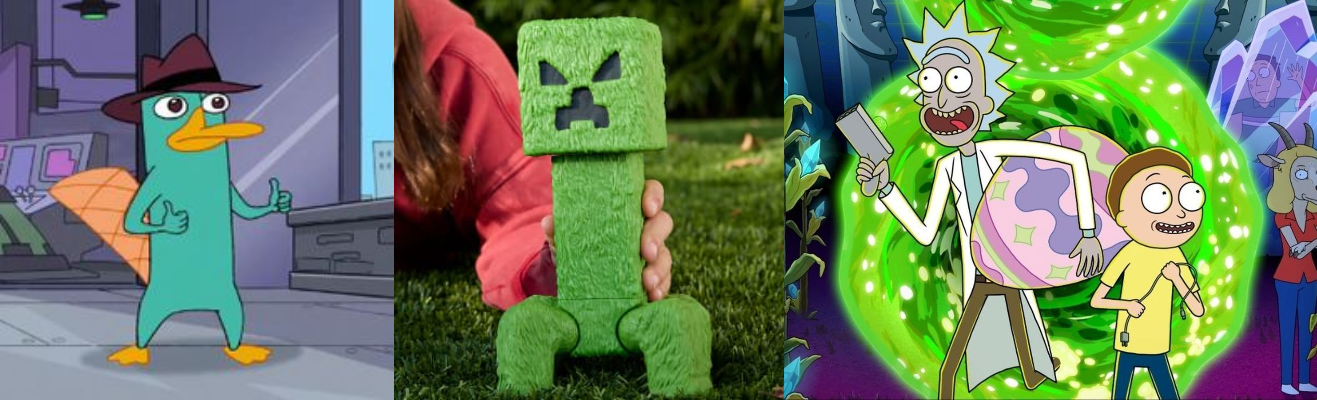

In [6]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

urls = [
    "https://i.pinimg.com/236x/81/ec/f7/81ecf78e0e1078455ef3b2ad7e0c1285.jpg",
    "https://images.mattel.net/images/c_scale,f_auto,w_360/shop-us-prod/files/8b8a4aee589d3761fc2ef3ec64091da1e84d1735_adaf6eb4-22df-4119-ab64-43e64e74db2c/.jpg",
    "https://tm.ibxk.com.br/2025/07/29/29130308679229.jpg?ims=1200x900",

]

lista_imagens = []

for url in urls:
    image = io.imread(url)

    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    largura_orig, altura_orig = image_bgr.shape[1], image_bgr.shape[0]
    nova_altura = 400
    nova_largura = int(largura_orig * (nova_altura / altura_orig))
    image_resized = cv2.resize(image_bgr, (nova_largura, nova_altura))

    lista_imagens.append(image_resized)

if len(lista_imagens) > 1:
    final_frame = cv2.hconcat(lista_imagens)
    cv2_imshow(final_frame)

<h1> Conclusão </h1>

Na Parte 1, os quatro programas explorados cobriram o fluxo completo de processamento visual: leitura de imagem em arquivo, reprodução de vídeo, captura via webcam e gravação de vídeo. Durante os experimentos, foi possível compreender conceitos fundamentais como o uso correto das flags de leitura do cv.imread(), o impacto do waitKey() no controle de FPS, e a importância de liberar recursos com cap.release() e destroyAllWindows() ao final da execução.<br><br>
Ficou evidente que o controle de velocidade de exibição de vídeo está diretamente ligado ao tempo de espera entre frames reduzir o valor de waitKey acelera a reprodução, enquanto aumentá-lo a desacelera. A forma mais precisa de sincronizar a exibição é lendo o FPS real do arquivo com cap.get(cv.CAP_PROP_FPS).<br><br>
Na Parte 2, os programas foram adaptados para o formato Jupyter Notebook e utilizados para a obtenção de fotos individuais, fotos em equipe e vídeos com diferentes velocidades de movimento, consolidando na prática o uso da webcam como dispositivo de entrada.<br><br>
De forma geral, o laboratório proporcionou uma visão clara do pipeline de processamento de imagens desde a entrada (câmera ou arquivo) até a saída (tela ou arquivo salvo) e estabeleceu a base necessária para os próximos experimentos envolvendo processamento e transformação das imagens capturadas.</p>



<h1> Referências </h1>
<p>MINICHINO, J. HOWSE, J., Learning OpenCV 3 Computer Vision with Python, 2
nd Ed, Packt
Publishing, 2015.</p>
<a href="https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html">Documentação do OpenCV</a>
